In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
docking_data=pd.read_csv("docking_combined.dat",sep="\\s+",header=None)
docking_data[0]=docking_data[0].apply(lambda s: int(s.replace("oleObject","").replace(".pdb","")))

data=pd.read_csv("NCATS_known_extracted.csv")
Ki_S100B=pd.to_numeric(data.Ki_S100B,errors="coerce").values
Ki_S100A1=pd.to_numeric(data.Ki_S100A1,errors="coerce").values

docking_key=dict()
for i in range(len(docking_data)):
    docking_key[docking_data[0][i]-1]=docking_data[1][i]
docking_scores=np.zeros(len(Ki_S100B))
for k in docking_key:
    docking_scores[k]=docking_key[k]
docking_scores[docking_scores==0]=np.nan

print(len(docking_scores),len(Ki_S100A1),len(Ki_S100B)) # All equal needed

filt=np.isnan(docking_scores) | np.isnan(Ki_S100B)
Ki_clean=Ki_S100B[~filt]
dock_clean=docking_scores[~filt]
true_order=list(np.argsort(Ki_clean))
dock_order=list(np.argsort(dock_clean))
print(len(dock_order),len(true_order)) # Should be equal

98 98 98
80 80


In [3]:
def score_ordering(N):
    match=0
    for _ in range(N):
        sel=np.random.choice(true_order,2)
        ic1=true_order.index(sel[0])<true_order.index(sel[1])
        ic2=dock_order.index(sel[0])<dock_order.index(sel[1])
        if ic1==ic2: match+=1
    return match/N
score_ordering(1000)

0.565

(-4.5, 4.5)

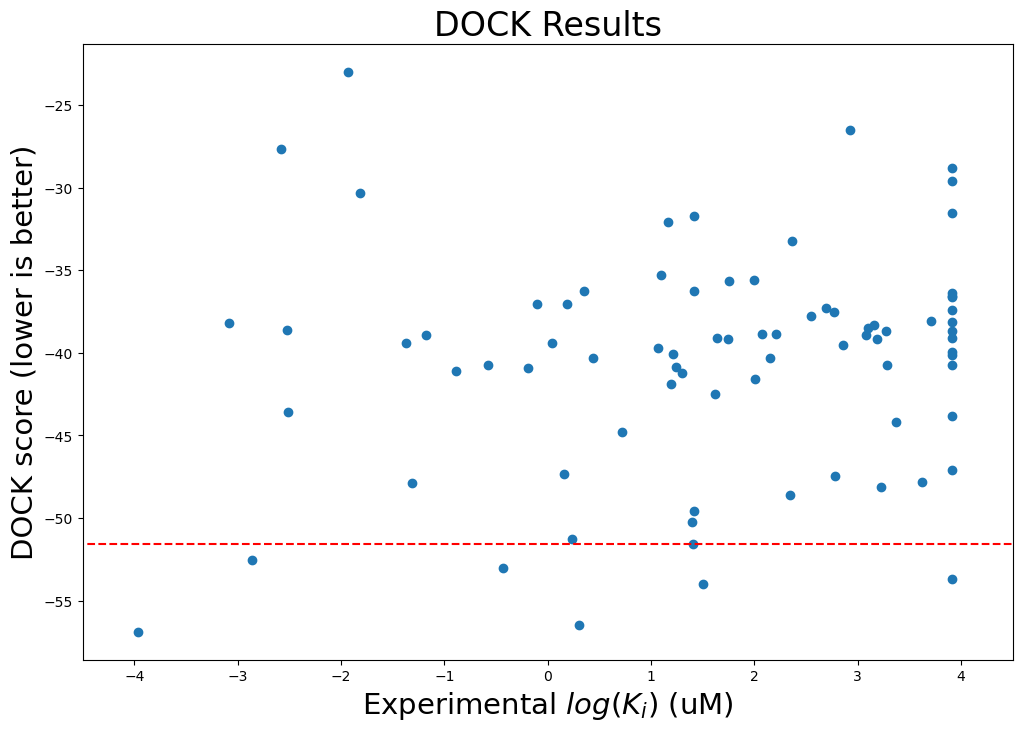

In [4]:
opt_cut=np.max(docking_scores[np.argsort(docking_scores)[:8]])
plt.figure(figsize=(12,8))
plt.title("DOCK Results",fontsize=24)
plt.scatter(np.log(Ki_clean),dock_clean)
plt.xlabel("Experimental $log(K_i)$ (uM)",fontsize=21)
plt.ylabel("DOCK score (lower is better)",fontsize=21)
plt.hlines(y=opt_cut,xmin=-20,xmax=60,linestyle="--",color="red")
plt.xlim(-4.5,4.5)

In [5]:
print("Cutoff chosen by top 8 (10%):",opt_cut,"\n")
GOOD_CUT=-1.0
DOCK_CUT=opt_cut
original_richness=np.sum(np.log(Ki_clean)<GOOD_CUT)/len(Ki_clean)
print("Original richness:",original_richness)
final_richness=np.sum(np.log(Ki_clean[dock_clean<DOCK_CUT])<GOOD_CUT)/np.sum(dock_clean<DOCK_CUT)
print("After DOCK:",final_richness)

Cutoff chosen by top 8 (10%): -51.571888 

Original richness: 0.1375
After DOCK: 0.3333333333333333


In [6]:
print("Original good ligands were 1 in",round(1/original_richness))
print("Final good ligands were 1 in",round(1/(final_richness +1e-8)))
print("Raw richness values:",final_richness)

Original good ligands were 1 in 7
Final good ligands were 1 in 3
Raw richness values: 0.3333333333333333
